# Assignment 4: Pipelines and Hyperparameter Tuning (32 total marks)
### Due: November 22 at 11:59pm

### Name: Moaz Barakat

### In this assignment, you will be putting together everything you have learned so far. You will need to find your own dataset, do all the appropriate preprocessing, test different supervised learning models and evaluate the results. More details for each step can be found below.

### You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Import Libraries

In [31]:
import numpy as np
import pandas as pd

#A4 ML imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.impute import SimpleImputer

## Step 1: Data Input (4 marks)

Import the dataset you will be using. You can download the dataset onto your computer and read it in using pandas, or download it directly from the website. Answer the questions below about the dataset you selected. 

To find a dataset, you can use the resources listed in the notes. The dataset can be numerical, categorical, text-based or mixed. If you want help finding a particular dataset related to your interests, please email the instructor.

**You cannot use a dataset that was used for a previous assignment or in class**

In [3]:
# Import dataset (1 mark)
water_df = pd.read_csv('water_potability_a4.csv')

### Questions (3 marks)

1. (1 mark) What is the source of your dataset?
1. (1 mark) Why did you pick this particular dataset?
1. (1 mark) Was there anything challenging about finding a dataset that you wanted to use?

*ANSWER HERE*

1. What is the source of your dataset?
- The dataset was aquired from Kaggle: Water Potability - Drinking water <cite> https://www.kaggle.com/datasets/adityakadiwal/water-potability</cite>
2. Why did you pick this particular dataset?
- The dataset looked interesting to me since we all drink water. Its important for that water to be safe for use when we consume or else it could lead to dire health issues. Therefore, water potability is a good dataset to study and perform ML on. 
3. Was there anything challenging about finding a dataset that you wanted to use?
- No, not necessarily. The challenging part I would say is that there are so many datasets to choose from. However, Kaggle (which we've been using in the labs) provides access to a variety of datasets as well as a very nice search engine to search or explore datasets.  

## Step 2: Data Processing (5 marks)

The next step is to process your data. Implement the following steps as needed.

In [10]:
# Clean data (if needed)

# Checking data
water_df.info()

# Print first few rows
water_df.head()

# Checking nulls 
water_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [32]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


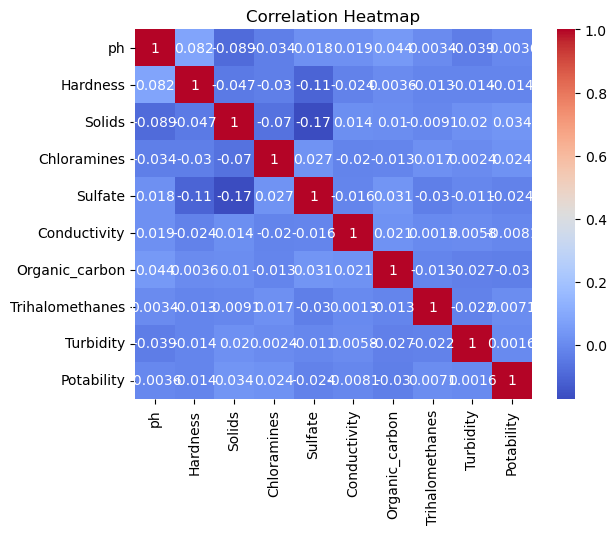

In [13]:
# Implement preprocessing steps. Remember to use ColumnTransformer if more than one preprocessing method is needed

# Quick correlation map
sns.heatmap(water_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# There are only numerical columns, preprocess
preprocess = Pipeline([
    ('impute',SimpleImputer()),
    ('scale',StandardScaler())
])


### Questions (2 marks)

1. (1 mark) Were there any missing/null values in your dataset? If yes, how did you replace them and why? If no, describe how you would've replaced them and why.
2. (1 mark) What type of data do you have? What preprocessing methods would you have to apply based on your data types?

*ANSWER HERE*
1. Were there any missing/null values in your dataset? If yes, how did you replace them and why? If no, describe how you would've replaced them and why.
- Yes there were missing values, specifically in 3 columns (ph, Sulfate, Trihalomethanes) - all are numerical columns. I decided to use the preprocessing steps of standardscaler and simpleimputer (default strategy). As we learned in lectures, the model does not get much information from dropping the columns with nulls. Imputing the values will ensure these rows will blend in + its much simpler to use in a pipeline.
2. What type of data do you have? What preprocessing methods would you have to apply based on your data types?
- The data has all numerical columns including the target column. I applied two preprocessing methods:
- **SimpleScaler**: Some algorithms are sensitive to the scaling of numerical features e.g (SVM) and scalers will bring numerical features to a similar scale
- **SimpleImputer**: Imputing the values will ensure these rows will blend in + its much simpler to use in a pipeline

## Step 3: Implement Machine Learning Model (11 marks)

In this section, you will implement three different supervised learning models (one linear and two non-linear) of your choice. You will use a pipeline to help you decide which model and hyperparameters work best. It is up to you to select what models to use and what hyperparameters to test. You can use the class examples for guidance. You must print out the best model parameters and results after the grid search.

In [23]:
# Implement pipeline and grid search here. Can add more code blocks if necessary
# Split data into features (X) and target (y)
X = water_df.drop('Potability', axis=1)
y = water_df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train = pd.DataFrame(data=preprocess.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=preprocess.transform(X_test), columns=X_test.columns)

# Note: this is similar to what we learned in lab 6

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocess),
    ('classifier', LogisticRegression())
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocess),
    ('classifier', RandomForestClassifier())
])

# SVC Pipeline
svm_pipeline = Pipeline([
    ('preprocessor', StandardScaler()),
    ('classifier', SVC())
])


# Define parameter grids
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15]
}

param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'], 
    'classifier__solver': ['liblinear', 'saga'] 
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# Create GridSearchCV instances for each algorithm with multiple scoring metrics
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring=scoring, refit='f1_score')
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring=scoring, refit='f1_score')
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring=scoring, refit='f1_score')

# Fit the models
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters based on F1
best_params_rf = grid_search_rf.best_params_
best_params_lr = grid_search_lr.best_params_
best_params_svm = grid_search_svm.best_params_

# Access the results for both scoring metrics
results_rf = grid_search_rf.cv_results_
results_lr = grid_search_lr.cv_results_
results_svm = grid_search_svm.cv_results_

# Print the results for accuracy and F1
print("Random Forest Results:")
print("Accuracy scores:", results_rf['mean_test_accuracy'])
print("F1 scores:", results_rf['mean_test_f1_score'])
print("\nBest Parameters for Random Forest based on F1:", best_params_rf)

print("\nLogistic Regression Results:")
print("Accuracy scores:", results_lr['mean_test_accuracy'])
print("F1 scores:", results_lr['mean_test_f1_score'])
print("\nBest Parameters for Logistic Regression based on F1:", best_params_lr)

print("\nSVM Results:")
print("Accuracy scores:", results_svm['mean_test_accuracy'])
print("F1 scores:", results_svm['mean_test_f1_score'])
print("\nBest Parameters for SVM based on F1:", best_params_svm)



Random Forest Results:
Accuracy scores: [0.63549618 0.63396947 0.63587786 0.65839695 0.66068702 0.65763359
 0.66068702 0.66450382 0.67061069]
F1 scores: [0.20518432 0.19438198 0.20136633 0.35050199 0.35341484 0.34365006
 0.40518831 0.40781093 0.41769057]

Best Parameters for Random Forest based on F1: {'classifier__max_depth': 15, 'classifier__n_estimators': 300}

Logistic Regression Results:
Accuracy scores: [0.60992366 0.60992366 0.60992366 0.60992366 0.60992366 0.60992366
 0.60992366 0.60992366 0.60992366 0.60992366 0.60992366 0.60992366]
F1 scores: [0.         0.         0.00195122 0.00195122 0.00195122 0.00195122
 0.00195122 0.00195122 0.00195122 0.00195122 0.00195122 0.00195122]

Best Parameters for Logistic Regression based on F1: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

SVM Results:
Accuracy scores: [0.60992366 0.61068702 0.60992366 0.68091603 0.60992366 0.67175573]
F1 scores: [0.         0.0038835  0.         0.42983663 0.        

### Questions (5 marks)

1. (1 mark) Do you need regression or classification models for your dataset?
1. (2 marks) Which models did you select for testing and why?
1. (2 marks) Which model worked the best? Does this make sense based on the theory discussed in the course and the context of your dataset?

*ANSWER HERE*

1. Do you need regression or classification models for your dataset?
- Classification model since we are trying to categorize a class (potability) - safe for drinking or not
2. Which models did you select for testing and why?
- As per assignment, we needed to choose 1 linear and 2 non-linear models for testing. I choose Logistic Regression since its one of the only options availble for linear classification, defaulted to l1 reg. For non-linear models, I wanted to mix the model types. I picked a tree based model - Random Forest and a kernel based model - SVM. All three of the models we have been using in the course so far.
3. Which model worked the best? Does this make sense based on the theory discussed in the course and the context of your dataset?
- The model that worked best is the random forest model. Generally, the non-linear models worked better than the linear models, this is expected since most real world problems have non-linear properties as discussed in the course. Additionally, the potability dataset and correlation map (shown above) suggest that the dataset does not have linear properties. Therefore, the result makes sense.

## Step 4: Validate Model (6 marks)

Use the testing set to calculate the testing accuracy for the best model determined in Step 3.

In [27]:
# Calculate testing accuracy (1 mark)

# Note similar to lab 6

# Extract the mean test accuracy and test accuracy scores
mean_test_accuracy_rf = results_rf['mean_test_accuracy']
mean_test_accuracy_lr = results_lr['mean_test_accuracy']
mean_test_accuracy_svm = results_svm['mean_test_accuracy']

test_accuracy_rf = grid_search_rf.score(X_test, y_test)
test_accuracy_lr = grid_search_lr.score(X_test, y_test)
test_accuracy_svm = grid_search_svm.score(X_test, y_test)


data = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Mean Test Accuracy': [mean_test_accuracy_rf, mean_test_accuracy_lr, mean_test_accuracy_svm],
    'Test Accuracy': [test_accuracy_rf, test_accuracy_lr, test_accuracy_svm]
}

pd.DataFrame(data)


,Algorithm,Mean Test Accuracy,Test Accuracy
0,Random Forest,"[0.6354961832061068, 0.6339694656488549, 0.635...",0.407713
1,Logistic Regression,"[0.6099236641221374, 0.6099236641221374, 0.609...",0.000000
2,SVM,"[0.6099236641221374, 0.6106870229007635, 0.609...",0.437055


In [30]:

def evaluate_classifier(grid_search, X_test, y_test):

    # Make predictions on the test set
    test_predictions = grid_search.predict(X_test)

    # Calculate accuracy and F1 score on the test set
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    return accuracy, f1



lr_acc, lr_f1 = evaluate_classifier(grid_search_lr, X_test, y_test)
rf_acc, rf_f1 = evaluate_classifier(grid_search_rf, X_test, y_test)
svm_acc, svm_f1 = evaluate_classifier(grid_search_svm, X_test, y_test)

data_two = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Test Accuracy': [rf_acc, lr_acc, svm_acc],
    'Test F1 Score': [rf_f1, lr_f1, svm_f1]
}

pd.DataFrame(data_two)

,Algorithm,Test Accuracy,Test F1 Score
0,Random Forest,0.672256,0.407713
1,Logistic Regression,0.609756,0.000000
2,SVM,0.638720,0.437055



### Questions (5 marks)

1. (1 mark) Which accuracy metric did you choose? 
1. (1 mark) How do these results compare to those in part 3? Did this model generalize well?
1. (3 marks) Based on your results and the context of your dataset, did the best model perform "well enough" to be used out in the real-world? Why or why not? Do you have any suggestions for how you could improve this analysis?

*ANSWER HERE*

1. Which accuracy metric did you choose? 
- The scores were based on mean test accuracy and f1 score, the results of the gridsearch and the accuracy/f1 against the test data is shown in the tables above.
2. How do these results compare to those in part 3? Did this model generalize well?
- The results did not improve by much, the best model generalized to an accuracy score of 0.67 which is in my opinion is not great.  
3. Based on your results and the context of your dataset, did the best model perform "well enough" to be used out in the real-world? Why or why not? Do you have any suggestions for how you could improve this analysis?
- No, the best model did not perform "well enough" based on the context of potability. This is beacause we all drink water and we want to be as safe as possible drinking the water. The best accuracy against the real dataset was 0.67 which is not great. There are multiple suggestions to improve the accuracy:
    - Try new models, I only limit it to 3 models as per assignment, there could be models that works better than others
    - It could be that we need a better dataset, there were a lot of null values and that could be problematic
    - It could be that we need more features (more columns) in the dataset to help with identifying the potability
    - It could be that we need more data (more rows) for the model to better assess the potability 


## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. Where did you source your code?
 - Code is based on a combination of lectures examples and documentation from scikit learn
  - Lecture slides adopted from: <cite>Introduction to Machine Learning with Python, Müller and Guido, 1st ed, 2016 https://github.com/amueller/introduction_to_ml_with_python</cite>
  - Scikit learn general documentation available at: <cite> https://scikit-learn.org/stable/ </cite>
  - Water Potability dataset: <cite> https://www.kaggle.com/datasets/adityakadiwal/water-potability </cite>
2. In what order did you complete the steps?
  - The order of the steps was done as per the assignment and all other assignments so far, steps 1-5 as it seemed logically
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
  - Similar to all previous assignments, I explicitly avoided using any generative AI throughout this process so I can learn while doing the assignment
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
  - No major challenges, examples on D2L and the labs really helped me a lot. 

## Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

what you liked or disliked: 
- I liked that we went through a full machine learning process on a dataset of our chosing

found interesting, confusing, challangeing, motivating:
- It was intersting how I was able to apply what I learned so far to a random dataset that I chose, which simulates a real world example. Addtionally, I thought the dataset was interesting since we all drink water everyday. Luckily, I researched that there are machine learning algorithims that are able to reach 0.98 accuracy scores for potability 